In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


admissions = pd.read_csv("admissions.csv")
admissions["actual_label"] = admissions["admit"]
admissions = admissions.drop("admit", axis=1)

admissions.head()

,gpa,gre,actual_label
0,3.177277,594.102992,0
1,3.412655,631.528607,0
2,2.728097,553.714399,0
3,3.093559,551.089985,0
4,3.141923,537.184894,0


In [7]:
import numpy as np
np.random.seed(8)
admissions = pd.read_csv("admissions.csv")
admissions["actual_label"] = admissions["admit"]
admissions = admissions.drop("admit", axis=1)
shuffled_index = np.random.permutation(admissions.index)
#print shuffled_index
shuffled_admissions = admissions.loc[shuffled_index]

train = shuffled_admissions.iloc[0:515]
test = shuffled_admissions.iloc[515:len(shuffled_admissions)]

shuffled_admissions.head()

,gpa,gre,actual_label
260,3.414036,577.665610,0
173,2.932147,564.798764,0
256,2.674040,599.895858,0
167,2.923581,622.524665,0
400,3.414376,704.934217,1


In [6]:
shuffled_index = np.random.permutation(admissions.index)
shuffled_admissions = admissions.loc[shuffled_index]
train = shuffled_admissions.iloc[0:515]
test = shuffled_admissions.iloc[515:len(shuffled_admissions)]
model = LogisticRegression()
model.fit(train[["gpa"]], train["actual_label"])

labels = model.predict(test[["gpa"]])
test["predicted_label"] = labels

matches = test["predicted_label"] == test["actual_label"]
correct_predictions = test[matches]
accuracy = len(correct_predictions) / float(len(test))
print(accuracy)

0.6744186046511628


In [8]:
model = LogisticRegression()
model.fit(train[["gpa"]], train["actual_label"])
labels = model.predict(test[["gpa"]])
test["predicted_label"] = labels
matches = test["predicted_label"] == test["actual_label"]
correct_predictions = test[matches]
accuracy = len(correct_predictions) / len(test)
true_positive_filter = (test["predicted_label"] == 1) & (test["actual_label"] == 1)
true_positives = len(test[true_positive_filter])
false_negative_filter = (test["predicted_label"] == 0) & (test["actual_label"] == 1)
false_negatives = len(test[false_negative_filter])

sensitivity = true_positives / float((true_positives + false_negatives))
print(sensitivity)

false_positive_filter = (test["predicted_label"] == 1) & (test["actual_label"] == 0)
false_positives = len(test[false_positive_filter])
true_negative_filter = (test["predicted_label"] == 0) & (test["actual_label"] == 0)
true_negatives = len(test[true_negative_filter])

specificity = (true_negatives) / float((false_positives + true_negatives))
print(specificity)

0.08333333333333333
0.9629629629629629


In [18]:
probabilities[:10]

array([[0.62171133, 0.37828867],
       [0.72377612, 0.27622388],
       [0.61434518, 0.38565482],
       [0.52767642, 0.47232358],
       [0.56051981, 0.43948019],
       [0.64723974, 0.35276026],
       [0.65535811, 0.34464189],
       [0.65837638, 0.34162362],
       [0.700361  , 0.299639  ],
       [0.62959682, 0.37040318]])

[1.56699565 0.56699565 0.55892982 0.52769718 0.52079957 0.51409483
 0.48729048 0.48478616 0.47232358 0.45682096 0.45404344 0.44825865
 0.44735471 0.44662839 0.43948019 0.43183491 0.42973767 0.41936931
 0.41391714 0.39896779 0.3989527  0.39314828 0.3903302  0.38565482
 0.38375185 0.37455557 0.37400665 0.37378619 0.37183697 0.37040318
 0.36920836 0.36907618 0.36217795 0.34568347 0.34537239 0.34464189
 0.34399906 0.34335662 0.34162362 0.34159258 0.33856952 0.33512468
 0.33391225 0.33285588 0.32825933 0.32547907 0.32167954 0.32126957
 0.31865391 0.31262177 0.30738485 0.30137837 0.299639   0.28299648
 0.28287063 0.27622388 0.27526743 0.26072926 0.25781967 0.25222685
 0.25009686 0.23853779 0.21616619 0.21307354]


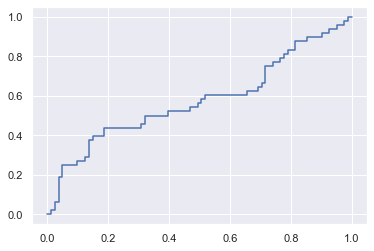

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn import metrics

probabilities = model.predict_proba(test[["gpa"]])
fpr, tpr, thresholds = metrics.roc_curve(test["actual_label"], probabilities[:,1])
print(thresholds)
plt.plot(fpr, tpr)
plt.show()

In [12]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test[["gpa"]])

# Means we can just use roc_auc_curve() instead of metrics.roc_auc_curve()
auc_score = roc_auc_score(test["actual_label"], probabilities[:,1])
print(auc_score)

0.5779320987654322
